The required ML task is supervised learning because we have a labeled dataset where we know the target variable, which is the individual medical costs (medicalCost). In supervised learning, the algorithm learns from the input features (predictors) and their corresponding output (target variable) to make predictions on new, unseen data.

As for the ML task in this case, the best choice is regression analysis. The goal is to estimate the medical cost of individuals based on various predictors like age, sex, BMI, number of children, smoker status, and region. Regression analysis is used when the target variable is continuous, which is the case here since medical costs can take on a wide range of numerical values.

In a regression analysis, the model learns to find the relationship between the input features and the continuous target variable (medical costs). The model will predict a numerical value as the estimated medical cost for a given set of input features.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,medicalCost
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


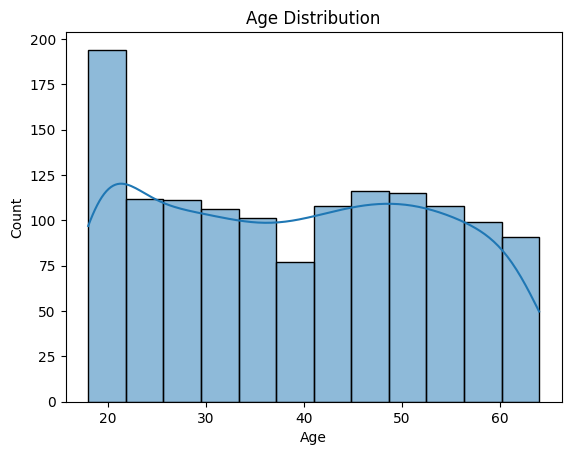

In [8]:
# Visualizing the Age Distribution
sns.histplot(df['age'], kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

In [9]:
df.age.value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

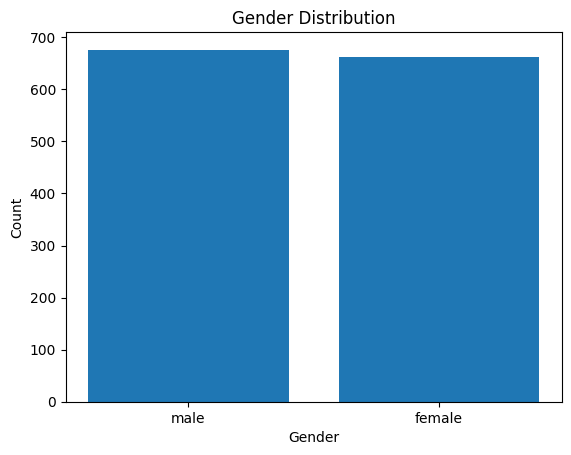

In [11]:
# Visualizing the Gender Distribution
gender_counts = df['sex'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

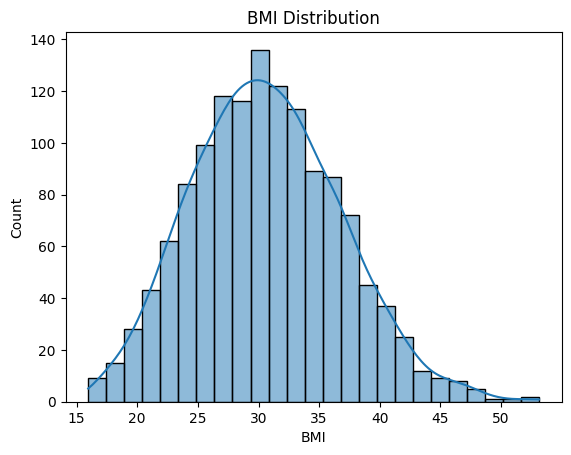

In [14]:
# Visualizing the BMI Distribution
sns.histplot(df['bmi'], kde=True)
plt.xlabel('BMI')
plt.title('BMI Distribution')
plt.show()

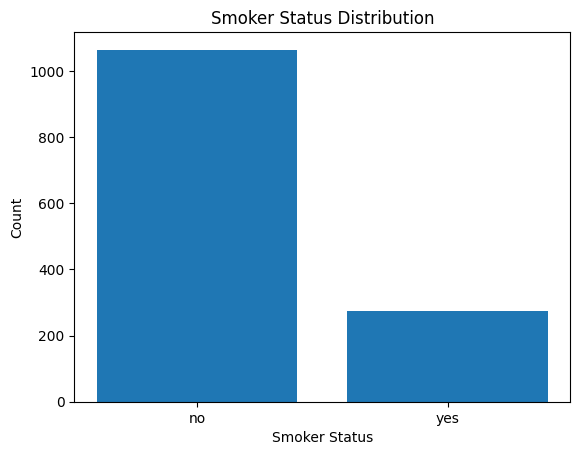

In [18]:
# Visualizing the BMI Distribution
smoker_counts = df['smoker'].value_counts()

plt.bar(smoker_counts.index, smoker_counts.values)
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.title('Smoker Status Distribution')
plt.show()

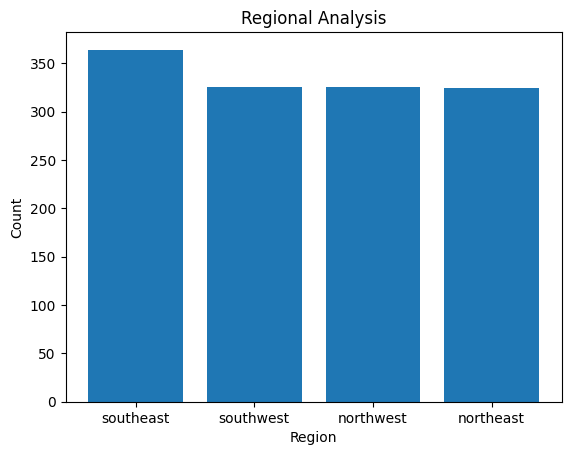

In [23]:
#Visualizing Number of Children Distribution

region_counts = df['region'].value_counts()

plt.bar(region_counts.index, region_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Regional Analysis')
plt.show()

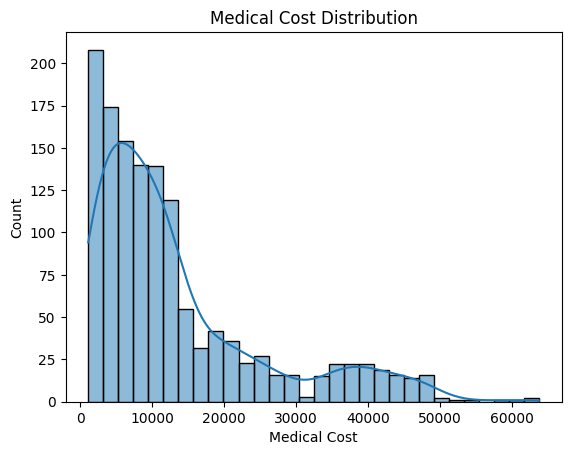

In [25]:
#Visualizing the Medical Cost Distribution
sns.histplot(df['medicalCost'], kde=True)
plt.xlabel('Medical Cost')
plt.title('Medical Cost Distribution')
plt.show()

<Axes: xlabel='age', ylabel='medicalCost'>

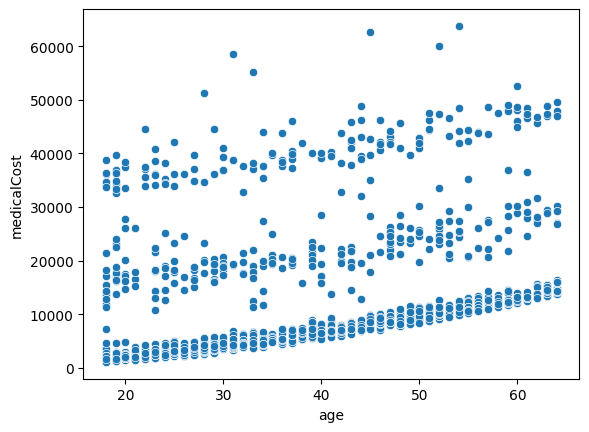

In [30]:
sns.scatterplot(x= 'age', y= 'medicalCost', data = df)

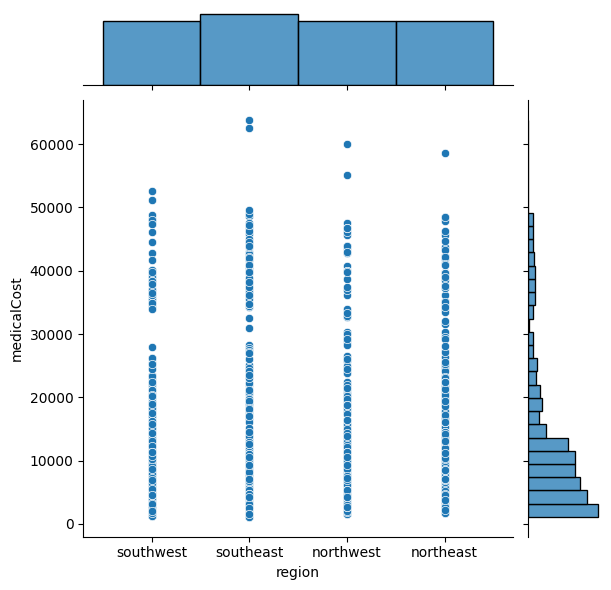

In [45]:
sns.jointplot(x= 'region', y= 'medicalCost', data = df)


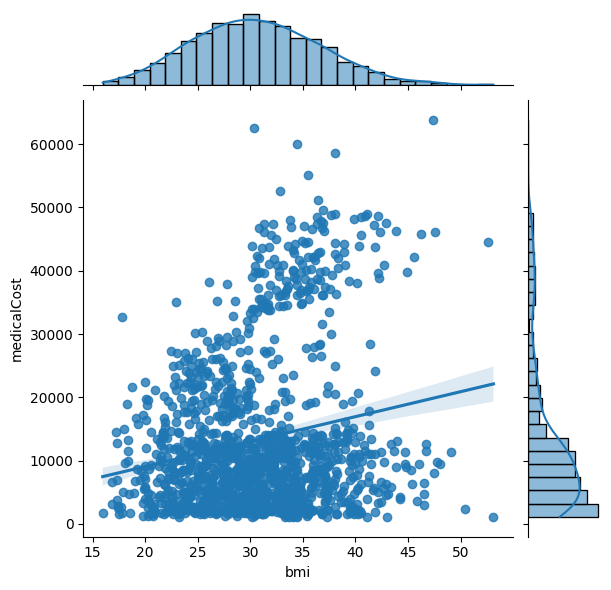

In [43]:
sns.jointplot(x= 'bmi', y= 'medicalCost', data = df,kind = 'reg')

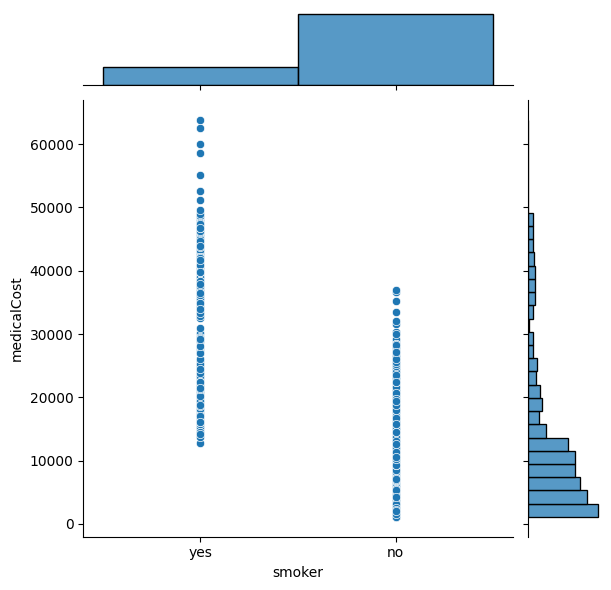

In [35]:
sns.jointplot(x= 'smoker', y='medicalCost' , data = df)

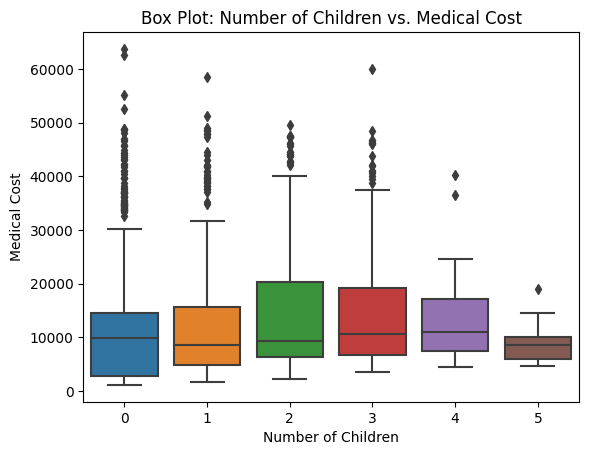

In [37]:
#Visualizing Number of Children vs. Medical Cost
sns.boxplot(x='children', y='medicalCost', data=df)
plt.xlabel('Number of Children')
plt.ylabel('Medical Cost')
plt.title('Box Plot: Number of Children vs. Medical Cost')
plt.show()

Correlation Analysis


In [46]:
df['sex'] = pd.factorize(df['sex'])[0] 
df['smoker'] = pd.factorize(df['smoker'])[0]  
df['region'] = pd.factorize(df['region'])[0]
correlation = df.corr()['medicalCost'].sort_values(ascending=False)
correlation

medicalCost    1.000000
age            0.299008
bmi            0.198341
children       0.067998
sex            0.057292
region         0.006208
smoker        -0.787251
Name: medicalCost, dtype: float64

<Axes: >

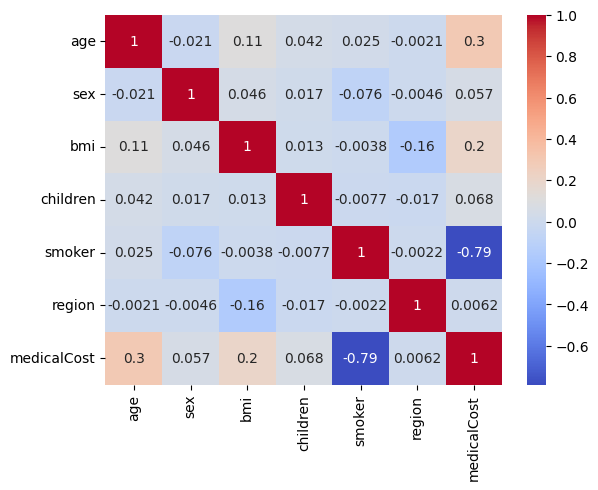

In [49]:
sns.heatmap(df.corr(), cmap= 'coolwarm', annot= True)

From the corelations and plots created so far

There is a positive correlation (0.3) between age and medicalCost. As age increases, medical costs tend to increase, indicating that older individuals may have higher medical expenses.

There is a positive correlation (0.2) between BMI and medicalCost. Individuals with higher BMI values may have higher medical costs relative to their body weight.

There is a positive correlation (0.07) between the number of children covered by health insurance and medicalCost. Having more children may be associated with slightly higher medical expenses.

There is a positive correlation (0.06) between gender (sex) and medicalCost. However, the correlation is relatively weak, suggesting that gender may have a minor influence on medical costs.

There is a very weak positive correlation (0.01) between the residential region and medicalCost. The impact of the region on medical costs appears to be minimal based on this correlation value.

There is a strong negative correlation (-0.79) between being a smoker and medicalCost. Smokers tend to have significantly higher medical costs compared to non-smokers, as indicated by the negative correlation.

From the correlation the three best predictors are:
1. Age
2. BMI
3. Smoker

Linear Regression Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
X = df[['age', 'bmi', 'smoker']]
Y = df['medicalCost']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)


In [53]:
#Linear Regression with age as the predictor
modelforage = LinearRegression()
modelforage.fit(X_train[['age']], Y_train)

LinearRegression()

In [54]:
#evaluating the model
Y_pred_age = modelforage.predict(X_test[['age']])
mse_age = mean_squared_error(Y_test, Y_pred_age)

In [55]:
r2_age = r2_score(Y_test, Y_pred_age)

In [56]:
performace = "Model 1 (Age) - Mean Squared Error:", mse_age
performace

('Model 1 (Age) - Mean Squared Error:', 145309348.26237297)

In [58]:
r_performance= "Model 1 (Age) - R-squared:", r2_age
r_performance

('Model 1 (Age) - R-squared:', 0.09346893645233456)

In [59]:
#Linear Regression with bmi as the predictor
model_bmi = LinearRegression()
model_bmi.fit(X_train[['bmi']], Y_train)

LinearRegression()

In [60]:
#evaluating the model
y_pred_bmi = model_bmi.predict(X_test[['bmi']])
mse_bmi = mean_squared_error(Y_test, y_pred_bmi)
r2_bmi = r2_score(Y_test, y_pred_bmi)

In [61]:
performance_bmi = "Model 2 (BMI) - Mean Squared Error:", mse_bmi
performance_bmi

('Model 2 (BMI) - Mean Squared Error:', 149739759.32253537)

In [63]:
r_performance_bmi = "Model 2 (BMI) - R-squared:", r2_bmi
r_performance_bmi

('Model 2 (BMI) - R-squared:', 0.06582924706999393)

In [64]:
#Linear Regression with bmi as the predictor
model_smoker = LinearRegression()
model_smoker.fit(X_train[['smoker']], Y_train)

LinearRegression()

In [65]:
#evaluating the model
y_pred_smoker = model_smoker.predict(X_test[['smoker']])
mse_smoker = mean_squared_error(Y_test, y_pred_smoker)
r2_smoker = r2_score(Y_test, y_pred_smoker)

In [66]:
performance_smoker = "Model 3 (Smoker) - Mean Squared Error:", mse_smoker
performance_smoker

('Model 3 (Smoker) - Mean Squared Error:', 55943736.65844015)

In [67]:
r_performance_smoker = "Model 3 (Smoker) - R-squared:", r2_smoker
r_performance_smoker

('Model 3 (Smoker) - R-squared:', 0.6509878015539998)

The 'smoker' predictor appears to be the most influential among the three predictors, as it has the highest R-squared value, indicating a moderate ability to explain medical costs' variability.
The 'BMI' and 'age' predictors have relatively low R-squared values, indicating they have limited predictive power for medical costs in this dataset.
Overall, while the 'smoker' predictor shows some ability to explain medical costs, the R-squared values for all three models are relatively low, suggesting that other factors not included in the dataset might play a more significant role in determining medical costs.

Multivariate regression model

In [70]:
X_selected = df[['age', 'bmi', 'smoker']]
X_all = df.drop(columns=['medicalCost'])
Y = df['medicalCost']

In [72]:
# Multivariate Regression with the three selected predictors
X_train_sel, X_test_sel, Y_train_sel, Y_test_sel = train_test_split(X_selected, Y, test_size=0.2, random_state=50)
model_sel = LinearRegression()
model_sel.fit(X_train_sel, Y_train_sel)

LinearRegression()

In [73]:
# Evaluating the models
Y_pred_sel = model_sel.predict(X_test_sel)
mse_sel = mean_squared_error(Y_test_sel, Y_pred_sel)
r2_sel = r2_score(Y_test_sel, Y_pred_sel)

In [74]:
mse_performance = "Model 1 (Selected Predictors) - Mean Squared Error:", mse_sel
rsquared_performance = "Model 1 (Selected Predictors) - R-squared:", r2_sel

In [75]:
mse_performance

('Model 1 (Selected Predictors) - Mean Squared Error:', 35124167.3731411)

In [76]:
rsquared_performance

('Model 1 (Selected Predictors) - R-squared:', 0.7808733630302511)

In [77]:
# Multivariate Regression with all predictors
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all, Y, test_size=0.2, random_state=50)
model_all = LinearRegression()
model_all.fit(X_train_all, Y_train_all)

LinearRegression()

In [78]:
#model evaluation
Y_pred_all = model_all.predict(X_test_all)
mse_all = mean_squared_error(Y_test_all, Y_pred_all)
r2_all = r2_score(Y_test_all, Y_pred_all)

In [79]:
mse_performance_all = "Model 2 (All Predictors) - Mean Squared Error:", mse_all
rsquared_performance_all = "Model 2 (All Predictors) - R-squared:", r2_all

In [80]:
mse_performance_all

('Model 2 (All Predictors) - Mean Squared Error:', 34204243.68304651)

In [81]:
rsquared_performance_all

('Model 2 (All Predictors) - R-squared:', 0.786612425321401)

Both models seem to have a reasonably good fit to the data, as indicated by their R-squared values.
Model 2, with all predictors, slightly outperforms Model 1, which includes only the selected predictors, as evident from its slightly lower MSE and higher R-squared value.
The selection of predictors in Model 1 seems to capture a significant portion of the variance in medical costs, but including additional predictors in Model 2 contributes to a slightly better overall predictive performance. It's important to note that Model 2 with all predictors might be more complex than Model 1, and additional predictors might have multicollinearity or little predictive power, potentially affecting the interpretability of the model.

Overall Conclusion


The multivariate regression analysis with all predictors highlights the significance of smoking, age, and BMI in predicting medical costs, and it provides a more robust and accurate model for medical cost prediction compared to the simple linear regression models with individual predictors.